# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | chernyshevskiy
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | thika
Processing Record 7 of Set 1 | urucara
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | labuhan
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | lexington
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | pandaria
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | sangar
Processing Record 20 of Set 1 | sao francisco do sul
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | tuktoya

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,12.08,98,100,4.78,BR,1686623226
1,severo-kurilsk,50.6789,156.1250,8.96,88,100,0.44,RU,1686623069
2,chernyshevskiy,63.0128,112.4714,15.68,31,2,1.08,RU,1686623226
3,comodoro rivadavia,-45.8667,-67.5000,7.92,34,0,6.17,AR,1686623226
4,busselton,-33.6500,115.3333,15.52,74,100,6.74,AU,1686623044


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,12.08,98,100,4.78,BR,1686623226
1,severo-kurilsk,50.6789,156.1250,8.96,88,100,0.44,RU,1686623069
2,chernyshevskiy,63.0128,112.4714,15.68,31,2,1.08,RU,1686623226
3,comodoro rivadavia,-45.8667,-67.5000,7.92,34,0,6.17,AR,1686623226
4,busselton,-33.6500,115.3333,15.52,74,100,6.74,AU,1686623044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

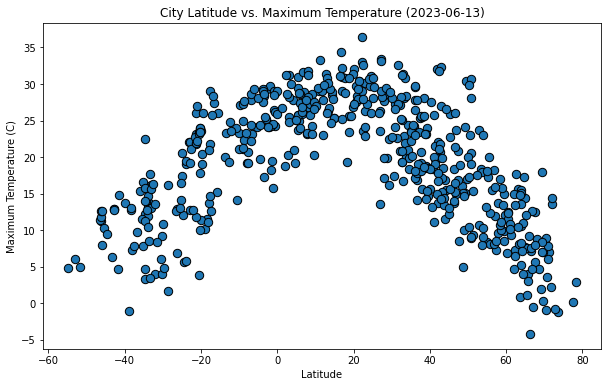

In [9]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black', s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.title(f'City Latitude vs. Maximum Temperature ({date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

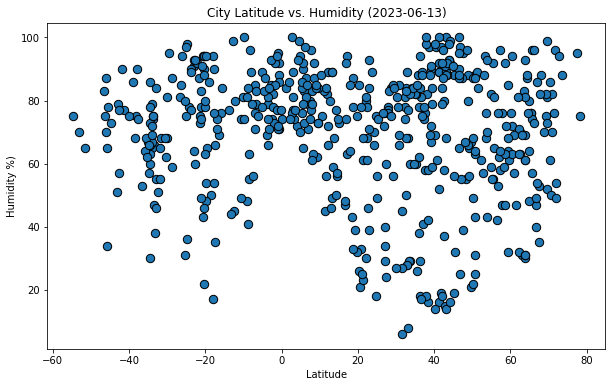

In [11]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolor='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Humidity %)")
plt.title(f'City Latitude vs. Humidity ({date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

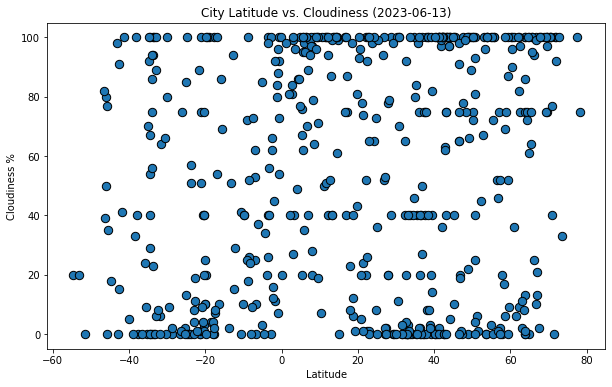

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f'City Latitude vs. Cloudiness ({date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

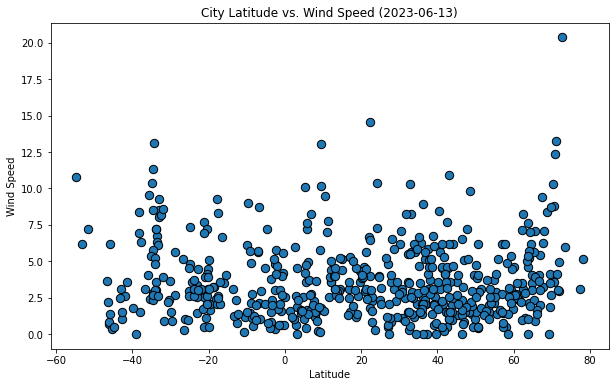

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City Latitude vs. Wind Speed ({date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def lin_reg_plots(x,y,xlabel,ylabel,title):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Create a line
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x,y)
    # Plot regression line
    plt.plot(x,regress_values,"red")
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,severo-kurilsk,50.6789,156.1250,8.96,88,100,0.44,RU,1686623069
2,chernyshevskiy,63.0128,112.4714,15.68,31,2,1.08,RU,1686623226
13,lexington,37.9887,-84.4777,15.62,82,8,3.71,US,1686622971
15,pandaria,22.2333,81.4167,36.36,30,52,3.95,IN,1686623228
18,sangar,63.9242,127.4739,15.54,30,100,2.13,RU,1686623228


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,12.08,98,100,4.78,BR,1686623226
3,comodoro rivadavia,-45.8667,-67.5000,7.92,34,0,6.17,AR,1686623226
4,busselton,-33.6500,115.3333,15.52,74,100,6.74,AU,1686623044
5,thika,-1.0333,37.0693,15.76,95,7,1.59,KE,1686623227
6,urucara,-2.5364,-57.7600,24.50,93,62,0.32,BR,1686623227


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.637491269367727


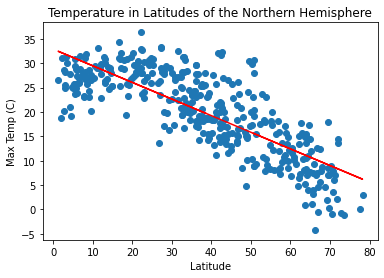

In [18]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
xlabel="Latitude"
ylabel="Max Temp (C)"
title = "Temperature in Latitudes of the Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

R squared: 0.5665801831507961


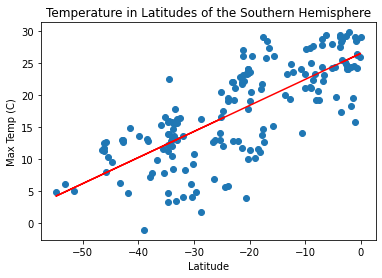

In [19]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
xlabel="Latitude"
ylabel="Max Temp (C)"
title = "Temperature in Latitudes of the Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

**Discussion about the linear relationship:** 
For both the Northern and Southern hemisphere, there was a linear relationship in which the temperature increased the closer the location was to 0 latitude (the equator).
There was more variability in the Southern hemisphere.  Data for the Northern Hemisphere was clustered more closely around the linear relationship.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.004697299225748903


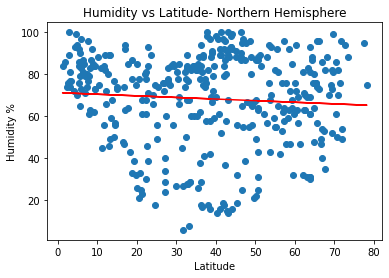

In [24]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
xlabel="Latitude"
ylabel="Humidity %"
title = "Humidity vs Latitude- Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)


R squared: 0.04226848254811711


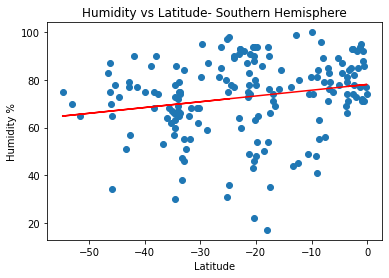

In [25]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
xlabel="Latitude"
ylabel="Humidity %"
title = "Humidity vs Latitude- Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

**Discussion about the linear relationship:** 
Both lines are nearly horizontal.  There does not seem to be a strong relationship between Latitude and Humidity.  At first, I expected humidity to be higher near the equator, thinking of water and tropical islands.  However, there are also large areas of desert near the equator, so this lack of correlation makes sense.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0005641804120472707


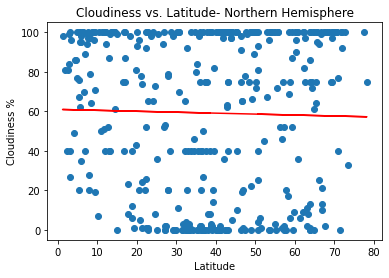

In [28]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
xlabel="Latitude"
ylabel="Cloudiness %"
title = "Cloudiness vs. Latitude- Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)


R squared: 0.004289212808698677


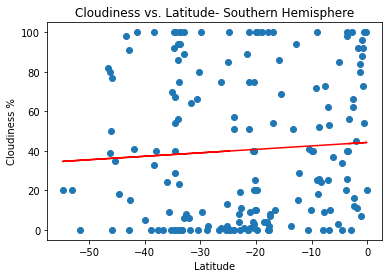

In [29]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
xlabel="Latitude"
ylabel="Cloudiness %"
title = "Cloudiness vs. Latitude- Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

**Discussion about the linear relationship:** 
Both lines are nearly horizontal.  There does not seem to be a strong relationship between Latitude and Cloudiness.
There are a lot of locations with either 100% cloudiness or 0% cloudiness.  This leads one to suspect the validity of the data.  Perhaps not all stations collect this information.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.00811652623216084


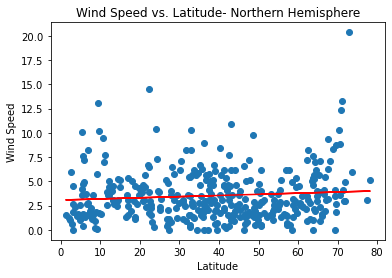

In [30]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
xlabel="Latitude"
ylabel="Wind Speed"
title = "Wind Speed vs. Latitude- Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

R squared: 0.05234078399259718


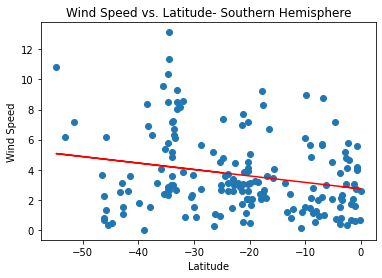

In [31]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
xlabel="Latitude"
ylabel="Wind Speed"
title = "Wind Speed vs. Latitude- Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the Northern Hemisphere, more of the data was clustered around the linear relationship, even though the outliers were farther away from the line.  
For instance, the highest wind speed in the Northern Hemisphere was over 20, while the highest in the Southern Hemisphere was around 13.  
There were also many locations that were under lower than the plot line.